<a href="https://colab.research.google.com/github/muniprasadreddy/my-colab_work/blob/main/home_credict_dataipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency


category:AME_CONTRACT_TYPE: This likely refers to the type of contract the applicant has with the institution, such as "Cash loans" or "Revolving loans."

CODE_GENDER: This indicates the gender of the applicant, typically represented as "M" for male and "F" for female.

FLAG_OWN_CAR: A flag indicating whether the applicant owns a car. Commonly represented as "Y" for yes and "N" for no.

FLAG_OWN_REALTY: A flag indicating whether the applicant owns real estate property. Commonly represented as "Y" for yes and "N" for no.

NAME_TYPE_SUITE: This specifies the type of suite the applicant lives in, which could include categories like "Unaccompanied", "Family", "Spouse, partner", "Children", etc.

NAME_INCOME_TYPE: This denotes the type of income the applicant has, such as "Working", "State servant", "Commercial associate", "Pensioner", "Unemployed", "Student", "Businessman", etc.

NAME_EDUCATION_TYPE: This represents the applicant's level of education, such as "Secondary / secondary special", "Higher education", "Incomplete higher", "Lower secondary", "Academic degree", etc.

NAME_FAMILY_STATUS: This indicates the marital status of the applicant, including categories like "Single / not married", "Married", "Civil marriage", "Widow", "Separated", "Divorced", etc.

NAME_HOUSING_TYPE: This specifies the type of housing the applicant resides in, such as "Rented apartment", "House / apartment", "Municipal apartment", "With parents", "Co-op apartment", "Office apartment", etc.

OCCUPATION_TYPE: This refers to the type of occupation the applicant has, such as "Laborers", "Core staff", "Managers", "Drivers", "Sales staff", "Accountants", "Cleaning staff", "Cooking staff", "HR staff", etc.

WEEKDAY_APPR_PROCESS_START: This indicates the day of the week when the application process was started, such as "Monday", "Tuesday", etc.

ORGANIZATION_TYPE: This describes the type of organization where the applicant is employed, like "Business Entity Type 3", "School", "Government", "Medicine", "Security Ministries", etc.

FONDKAPREMONT_MODE: This might refer to the mode of funding for major repairs, though the exact meaning can depend on the context provided by the dataset.

HOUSETYPE_MODE: This specifies the type of house the applicant lives in, such as "Block of flats", "Specific housing", or "Terraced house".

WALLSMATERIAL_MODE: This indicates the material of the walls of the applicant's house, like "Panel", "Stone, brick", "Wooden", "Mixed", "Monolithic", "Block", "Others".

EMERGENCYSTATE_MODE: This could refer to whether the applicant is in an emergency state, such as "Yes" or "No". The specific context will clarify its use.

K_ID_CURR: This is a unique identifier for each applicant. It is used to distinguish between different records in the dataset.

TARGET: This is the target variable indicating whether the applicant defaulted on the loan. Typically, it can be binary with "1" indicating default and "0" indicating non-default.

CNT_CHILDREN: This denotes the number of children the applicant has. It is an integer value representing the count of dependents under the age of 18.

AMT_INCOME_TOTAL: This is the total income of the applicant. It is a numeric value representing the annual income in the currency used by the institution.

AMT_CREDIT: This represents the total amount of credit the applicant has applied for. It is a numeric value denoting the loan amount requested.

AMT_ANNUITY: This indicates the annuity amount the applicant is supposed to pay for the loan. It is the periodic payment amount, usually calculated annually.

AMT_GOODS_PRICE: This is the price of the goods or services for which the loan is applied. It is a numeric value representing the cost of the item being financed.

REGION_POPULATION_RELATIVE: This indicates the relative population of the region where the applicant lives. It is a numeric value representing the proportion of the population in that region compared to the total population, often expressed as a fraction or percentage.

DAYS_BIRTH: This represents the age of the applicant in days at the time of application. It is a negative value, as it is calculated as the difference from the current date to the birth date.

DAYS_EMPLOYED: This denotes the total number of days the applicant has been employed. It is typically a negative value, representing the difference from the current date to the start date of employment. In some datasets, anomalies like extremely high positive values might be used to indicate unemployment or special cases.

AMT_REQ_CREDIT_BUREAU_HOUR:

This represents the number of credit bureau inquiries about the applicant within the last hour prior to the application. It is a numeric value indicating how many times the applicant's credit report was requested by various entities within this short time frame.
AMT_REQ_CREDIT_BUREAU_DAY:

This indicates the number of credit bureau inquiries about the applicant within the last day. It provides a count of how many times the applicant's credit information was checked within the past 24 hours.
AMT_REQ_CREDIT_BUREAU_WEEK:

This shows the number of credit bureau inquiries about the applicant within the last week. It is a numeric value reflecting the frequency of credit checks in the past seven days.
AMT_REQ_CREDIT_BUREAU_MON:

This column represents the number of credit bureau inquiries about the applicant within the last month. It indicates how often the applicant's credit report was requested in the past 30 days.
AMT_REQ_CREDIT_BUREAU_QRT:

This indicates the number of credit bureau inquiries about the applicant within the last quarter (three months). It is a count of credit report requests in the past 90 days.
AMT_REQ_CREDIT_BUREAU_YEAR:

This represents the number of credit bureau inquiries about the applicant within the last year. It shows how many times the applicant's credit report was checked over the past 12 months.

In [ ]:
data=pd.read_csv('/content/application_train (1).csv', encoding='latin-1')

In [ ]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
 data.shape

(307511, 122)

In [ ]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
data['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

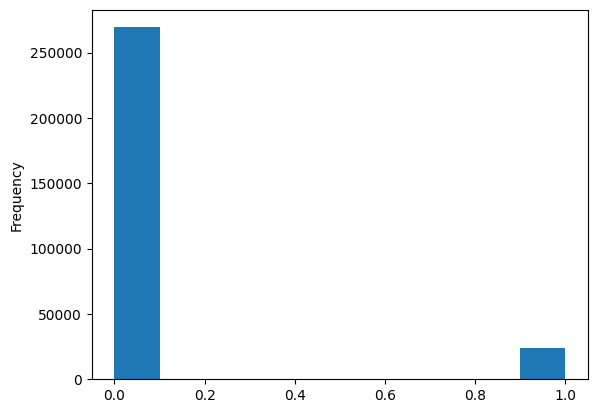

In [ ]:
#We see many traning examples belong 0 (no) and less to 1(yes). Lets visualize it too.


data["TARGET"].plot.hist()


In [ ]:
data.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [ ]:
print(data.dtypes == 'object')

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE             True
CODE_GENDER                    True
FLAG_OWN_CAR                   True
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     False
AMT_REQ_CREDIT_BUREAU_WEEK    False
AMT_REQ_CREDIT_BUREAU_MON     False
AMT_REQ_CREDIT_BUREAU_QRT     False
AMT_REQ_CREDIT_BUREAU_YEAR    False
Length: 122, dtype: bool


In [ ]:
data.isnull()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
307507,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
307508,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307509,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [ ]:
def missing_values_table(data):
    missing_val= data.isnull().sum()

    # Percentage of missing values

    missing_per = 100 *data.isnull().sum() /len(data)

    mis_values_table = pd.concat([missing_val,missing_per],axis=1)

    missing_val_table_columns = mis_values_table.rename(columns={0 : 'Missing Values', 1 : '% of Missing Values'})

    missing_val_table_columns = missing_val_table_columns[
            missing_val_table_columns.iloc[:,1] != 0].sort_values(
        '% of Missing Values', ascending=False).round(1)

    return missing_val_table_columns

In [ ]:
missing_values_table(data)

,Missing Values,% of Missing Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [ ]:
missing_values= missing_values_table(data)

In [ ]:
missing_values

,Missing Values,% of Missing Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


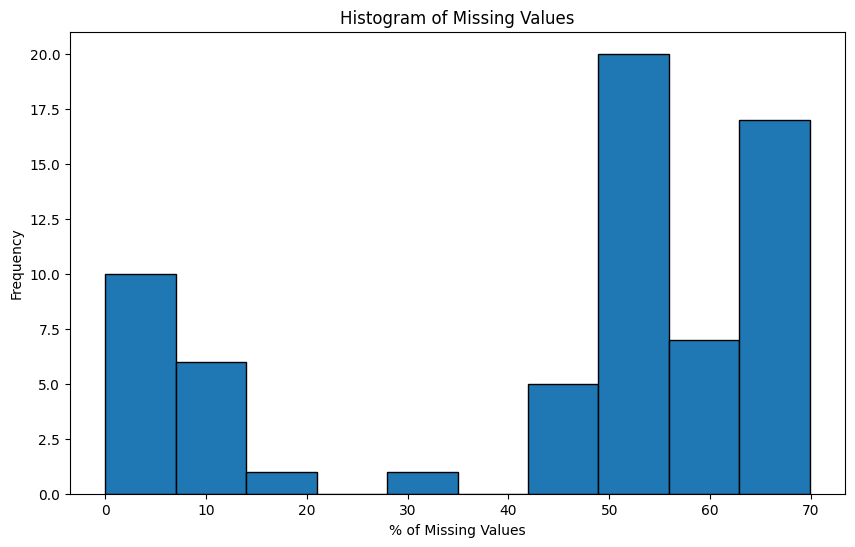

In [ ]:
#Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(missing_values['% of Missing Values'], bins=10, edgecolor='black')
plt.xlabel('% of Missing Values')
plt.ylabel('Frequency')
plt.title('Histogram of Missing Values')
plt.show()

In [ ]:
df=data

In [ ]:
df.shape

(307511, 122)

In [ ]:
missing_values= missing_values_table(data)

In [ ]:
missing_values_table(data).head(40)

,Missing Values,% of Missing Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [ ]:
missing_values_table(data).head(30)

,Missing Values,% of Missing Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [ ]:
def handle_missing_values(data):
    """
    Handles missing values in a DataFrame by replacing them with the median for numerical columns,
    the mode for categorical and character columns, or optionally using a model to predict missing values.
    """
    # Separate columns by type
    numerical_cols = data.select_dtypes(include=['number']).columns
    categorical_cols = data.select_dtypes(include=['category']).columns
    character_cols = data.select_dtypes(include=['object']).columns

    # Handle missing values for numerical columns using median
    for col in numerical_cols:
        median_value = df[col].median()
        data[col].fillna(median_value, inplace=True)

    # Handle missing values for categorical columns using mode
    for col in categorical_cols:
        mode_value = df[col].mode()[0]
        data[col].fillna(mode_value, inplace=True)

    # Handle missing values for character columns using mode
    for col in character_cols:
        mode_value = df[col].mode()[0]
        data[col].fillna(mode_value, inplace=True)

    return df
df=handle_missing_values(data)
df.isna().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [ ]:
df.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,...,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,-5.915201e-18,-5.785806e-17,-3.243953e-01,-1.268533e-17,1.280086e-17,4.556553e-17,-3.207148e-17,-1.590866e-17,-4.074788e-17,-0.000006,...,-3.306505e-17,-7.625064e-18,-1.940925e-18,8.225827e-18,-0.010309,-0.008533,-0.022666,-0.039413,-0.045140,-0.065004
std,1.000002e+00,1.000002e+00,1.110225e-16,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.999983,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.930412,0.930297,0.931814,0.935381,0.937038,0.944488
min,-1.733423e+00,-2.963415e-01,-3.243953e-01,-7.203700e-01,-7.179135e-01,-1.504820e+00,-5.775378e-01,-6.036870e-01,-1.376496e+00,-1.758906,...,-9.053411e-02,-2.440195e-02,-2.252901e-02,-1.830463e-02,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-1.016414
25%,-8.661836e-01,-2.963415e-01,-3.243953e-01,-7.203700e-01,-7.179135e-01,-1.504820e+00,-5.775378e-01,-2.374210e-01,-8.174760e-01,-0.730287,...,-9.053411e-02,-2.440195e-02,-2.252901e-02,-1.830463e-02,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-0.481452
50%,2.089836e-04,-2.963415e-01,-3.243953e-01,-7.203700e-01,-7.179135e-01,6.645314e-01,-5.775378e-01,-9.129414e-02,-2.124151e-01,-0.152175,...,-9.053411e-02,-2.440195e-02,-2.252901e-02,-1.830463e-02,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-0.481452
75%,8.654730e-01,-2.963415e-01,-3.243953e-01,1.388015e+00,1.392925e+00,6.645314e-01,8.072731e-01,1.421293e-01,5.208178e-01,0.516598,...,-9.053411e-02,-2.440195e-02,-2.252901e-02,-1.830463e-02,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,0.588472
max,1.732410e+00,3.374485e+00,-3.243953e-01,3.496400e+00,1.392925e+00,6.645314e-01,2.573387e+01,4.927034e+02,8.574059e+00,15.932212,...,1.104556e+01,4.098034e+01,4.438721e+01,5.463098e+01,47.628462,81.195624,38.916666,29.184045,328.358619,12.357637


In [ ]:
num_df = df.select_dtypes(include=['number'])

In [ ]:
num_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-1.733423,3.374485,-0.324395,1.388015,-0.717914,0.664531,-0.577538,0.142129,-0.478095,-0.166146,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-0.481452
1,-1.733413,-0.296342,-0.324395,-0.720370,-0.717914,-1.504820,-0.577538,0.426792,1.725450,0.592666,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-1.016414
2,-1.733403,-0.296342,-0.324395,1.388015,1.392925,0.664531,-0.577538,-0.427196,-1.152888,-1.404649,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-1.016414
3,-1.733384,-0.296342,-0.324395,-0.720370,-0.717914,0.664531,-0.577538,-0.142533,-0.711430,0.177865,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-0.481452
4,-1.733374,-0.296342,-0.324395,1.388015,-0.717914,0.664531,-0.577538,-0.199466,-0.213734,-0.361748,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-1.016414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.732372,-0.296342,-0.324395,1.388015,-0.717914,-1.504820,-0.577538,-0.047646,-0.855489,0.031008,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-0.481452
307507,1.732381,-0.296342,-0.324395,-0.720370,-0.717914,0.664531,-0.577538,-0.408219,-0.818594,-1.042319,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-0.481452
307508,1.732391,-0.296342,-0.324395,-0.720370,-0.717914,0.664531,-0.577538,-0.066623,0.195379,0.198046,...,-0.090534,-0.024402,-0.022529,-0.018305,11.849848,-0.063203,-0.167878,0.799786,-0.334328,-0.481452
307509,1.732401,3.374485,-0.324395,-0.720370,-0.717914,0.664531,-0.577538,0.009287,-0.568757,-0.476315,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-1.016414


In [ ]:
categorical_columns = df.select_dtypes(include=['category','object']).columns

In [ ]:
categorical_columns

Index([], dtype='object')

In [ ]:
### outlier treatment

In [ ]:
# Iterate over each categorical column
for column in categorical_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Determine the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Handle outliers (e.g., remove them)
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Alternatively, you can cap the outliers
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

    # Display the resulting dataframe
    print(f"Results for column: {column}")
    print(df_no_outliers)
    print(df)

In [ ]:


# # Identify categorical columns (you can do this manually or programmatically)
# categorical_columns = df.select_dtypes(include=['object']).columns

# # Display the categorical columns
# print("Categorical columns:", categorical_columns)

# # Create dummy variables
# df_with_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# # Display the dataframe with dummy variables
# print(df_with_dummies.head())


In [ ]:
def label_encode_all(df):
    """
    Perform label encoding on all categorical (object or category dtype) columns in the DataFrame.
    """
    le = LabelEncoder()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    return df

In [ ]:
# Perform label encoding on all categorical columns
df = label_encode_all(df)
print(df)

        SK_ID_CURR    TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0        -1.733423  3.374485           -0.324395     1.388015     -0.717914   
1        -1.733413 -0.296342           -0.324395    -0.720370     -0.717914   
2        -1.733403 -0.296342           -0.324395     1.388015      1.392925   
3        -1.733384 -0.296342           -0.324395    -0.720370     -0.717914   
4        -1.733374 -0.296342           -0.324395     1.388015     -0.717914   
...            ...       ...                 ...          ...           ...   
307506    1.732372 -0.296342           -0.324395     1.388015     -0.717914   
307507    1.732381 -0.296342           -0.324395    -0.720370     -0.717914   
307508    1.732391 -0.296342           -0.324395    -0.720370     -0.717914   
307509    1.732401  3.374485           -0.324395    -0.720370     -0.717914   
307510    1.732410 -0.296342           -0.324395    -0.720370     -0.717914   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_T

In [ ]:

# Identify numerical columns (you can do this manually or programmatically)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Display the numerical columns
print("Numerical columns:", numerical_columns)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the standardized dataframe
print(df.head())


Numerical columns: Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)
   SK_ID_CURR    TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0   -1.733423  3.374485        1.110223e-16     1.388015     -0.717914   
1   -1.733413 -0.296342        1.110223e-16    -0.720370     -0.717914   
2   -1.733403 -0.296342        1.110223e-16     1.388015      1.392925   
3   -1.733384 -0.296342        1.110223e-16    -0.720370     -0.717914   
4   -1.733374 -0.296342        1.110223e-16     1.388015     -0.717914   

   FLAG_OWN_REAL

In [ ]:
df2=df.sample(3000)

In [ ]:
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
255225,1.139610,-0.296342,1.110223e-16,1.388015,1.392925,0.664531,-0.577538,-0.047646,-0.482064,-0.473213,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,2.064297,-0.308620,-1.007331
272829,1.343336,-0.296342,1.110223e-16,-0.720370,-0.717914,0.664531,-0.577538,0.331904,0.321583,2.109714,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.308620,0.691885
230058,0.858950,-0.296342,1.110223e-16,-0.720370,-0.717914,0.664531,-0.577538,0.237017,-0.090750,-0.749235,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.308620,-1.007331
37675,-1.308868,-0.296342,1.110223e-16,1.388015,-0.717914,0.664531,-0.577538,-0.142533,0.387995,0.645155,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,1.035362,1.258290
226479,0.818683,-0.296342,1.110223e-16,-0.720370,-0.717914,-1.504820,0.807273,-0.142533,-0.387433,-0.514818,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.308620,1.258290


In [ ]:
X = df2[selected_columns]

In [ ]:
x

NameError: name 'x' is not defined

In [ ]:
y = train_df2[target_column]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

def build_and_evaluate_models(train_df2, target_column, selected_columns):
    """
    Build and evaluate multiple models on the provided training dataset without scaling.

    Args:
    - train_df (DataFrame): The training dataset.
    - target_column (str): The name of the target column.
    - selected_columns (list): List of column names to use as features.

    Returns:
    - results (dict): Dictionary containing evaluation metrics for each model.
    """
    X = train_df2[selected_columns]
    y = train_df2[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define models
    models = {
        'RandomForest': RandomForestClassifier(),
        'LogisticRegression': LogisticRegression(),
        'SVM': SVC(),
        'KNN': KNeighborsClassifier(),
        'DecisionTree': DecisionTreeClassifier(),
        'GradientBoosting': GradientBoostingClassifier(),
        'GaussianNB': GaussianNB(),
        'MLP': MLPClassifier(),
        'XGBoost': XGBClassifier(),
        'LightGBM': LGBMClassifier()
    }

    results = {}

    # Train and evaluate each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results[name] = {
            'confusion_matrix': cm,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }

    return results

# Example usage
train_df = ...  # Load your training data
target_column = 'TARGET'  # Replace with your target column name
selected_columns = df.drop('TARGET',axis=1).columns
results = build_and_evaluate_models(df, target_column, selected_columns)

# Print the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print(f"Precision: {metrics['precision']}")
    print(f"Recall: {metrics['recall']}")
    print(f"F1 Score: {metrics['f1_score']}")
    print()

ValueError: Unknown label type: 'continuous'